In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions as fx

from matplotlib import rc
from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Arial']

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

pad = 12
rcParams['xtick.major.pad'] = pad
rcParams['ytick.major.pad'] = pad

dpi = 200

%matplotlib inline

In [3]:
from galpy import potential
import astropy.units as u

In [1]:
craII_rh = 1100 # in units of parsecs
mcraII = 7.*(10.**6.) # in units of solar masses

herc_rh = 250 # in units of parsecs
mherc = 6*(10.**6.) #in units of solar masses 

# Setting up potential using McMillan 2017 parameterization

In [4]:
c = 1.0
ro = 8.2
vo = 232.8

tp_amp= potential.TriaxialNFWPotential(amp=1.,a=2.,c=c)
mvir= tp_amp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12. 
print(mvir)
# mass out to ~245 kpc in units of 10^12 Msun, for non-spherical potential need to give R and z max to integrate

tp= potential.TriaxialNFWPotential(amp=1.6/mvir,a=2.,c=c) #1.6 translates to 0.8*1.6 * 10^12 Msun
# amp = (0.8 x 10^12 Msun: desired mass) / (mvir x 10^12: mass for amp=1)
print(tp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12.) # Should be the mass you want

bp= potential.PowerSphericalPotentialwCutoff(alpha=1.8,rc=1.9/ro,normalize=0.05) 
mp= potential.MiyamotoNagaiPotential(a=3./ro,b=0.28/ro,normalize=.6)

0.2001449702847074
1.6000000001584909


In [6]:
dper = np.arange(0.5,245.5,.5,dtype='float')

menc_haloonly = np.empty(dper.size)
menc_bulg = np.empty(dper.size)
menc_disk = np.empty(dper.size)
menc_allcomp = np.empty(dper.size)
for i in range(dper.size):
    if dper[i] < 5.0:
        mhalo = tp.mass(dper[i]/ro,dper[i]/ro, ro=ro,vo=vo)
        mbulg = bp.mass(dper[i]/ro, ro=ro,vo=vo)
        mdisk = mp.mass(dper[i]/ro, dper[i]/ro, ro=ro,vo=vo)
    else: 
        mhalo = tp.mass(dper[i]/ro,dper[i]/ro, ro=ro,vo=vo)
        mbulg = bp.mass(dper[i]/ro, ro=ro,vo=vo)
        mdisk = mp.mass(dper[i]/ro, 5./ro, ro=ro,vo=vo)
        
    print(dper[i], mhalo/1e12, mbulg/1e12, mdisk/1e12)
    
    menc_haloonly[i] = mhalo
    menc_allcomp[i] = mhalo + mbulg + mdisk

0.5 0.00047487110001708253 0.001135433062519673 0.0008933315485230242
1.0 0.0018161990696458185 0.0024207535667278408 0.0037069290850950004
1.5 0.003912616279789259 0.0035054966622618693 0.007799971877626276
2.0 0.0066684091899446565 0.004275335382057307 0.012549534401822016
2.5 0.0100009712735081 0.0047435770868901415 0.017453176285880008
3.0 0.013838730937698362 0.004989399402438831 0.022183366418220583
3.5 0.018119454286625244 0.005101176468830312 0.026566748356562173
4.0 0.022788846641196393 0.005145283347112419 0.030535886000374598
4.5 0.027799393400568324 0.005160405047743855 0.0340851921097508
5.0 0.03310939414319046 0.005164912963759711 0.03724037995883849
5.5 0.038682153832071846 0.0051660821007629126 0.040033212526245615
6.0 0.044485302025837295 0.0051663459981838075 0.0425130122899944
6.5 0.05049021769898887 0.005166397854960708 0.04471973344145421
7.0 0.05667154096569703 0.005166406727861167 0.04668951045933077
7.5 0.063006757040658 0.005166408050015027 0.04845403883419543


63.5 0.7159610066129732 0.005166408243096028 0.07368511547715137
64.0 0.7202501709425407 0.005166408243096028 0.07371357631897292
64.5 0.724518297722848 0.005166408243096028 0.07374159717581033
65.0 0.7287655752025782 0.005166408243096028 0.0737691881626078
65.5 0.7329921895254843 0.005166408243096028 0.07379635908691012
66.0 0.7371983247474351 0.005166408243096028 0.07382311946044105
66.5 0.7413841628540164 0.005166408243096028 0.07384947851016387
67.0 0.7455498837786341 0.005166408243096028 0.07387544518884644
67.5 0.7496956654210527 0.005166408243096028 0.07390102818516586
68.0 0.7538216836663287 0.005166408243096028 0.07392623593336412
68.5 0.7579281124040905 0.005166408243096028 0.07395107662248636
69.0 0.7620151235481033 0.005166408243096028 0.07397555820521932
69.5 0.7660828870560956 0.005166408243096028 0.07399968840635122
70.0 0.7701315709498038 0.005166408243096028 0.07402347473086798
70.5 0.7741613413351914 0.005166408243096028 0.07404692447171325
71.0 0.7781723624228213 0.0

126.5 1.1355218136529612 0.005166408243096028 0.07550158626603887
127.0 1.1381412716990698 0.005166408243096028 0.07550880155632836
127.5 1.14075255571383 0.005166408243096028 0.075515960297518
128.0 1.1433557157250038 0.005166408243096028 0.07552306315164942
128.5 1.145950801312222 0.005166408243096028 0.07553011077047245
129.0 1.148537861612165 0.005166408243096028 0.07553710379564439
129.5 1.1511169453236714 0.005166408243096028 0.07554404285892456
130.0 1.153688100712779 0.005166408243096028 0.07555092858236441
130.5 1.1562513756176949 0.005166408243096028 0.07555776157849313
131.0 1.1588068174536956 0.005166408243096028 0.07556454245049922
131.5 1.1613544732179624 0.005166408243096028 0.07557127179240772
132.0 1.163894389494352 0.005166408243096028 0.07557795018925367
132.5 1.1664266124580964 0.005166408243096028 0.07558457821725197
133.0 1.1689511878804446 0.005166408243096028 0.07559115644396057
133.5 1.1714681611332356 0.005166408243096028 0.07559768542844605
134.0 1.1739775771

189.5 1.4139895857611442 0.005166408243096028 0.07611100057377063
190.0 1.4158658393397772 0.005166408243096028 0.07611422136529684
190.5 1.4177378652549444 0.005166408243096028 0.07611742525531445
191.0 1.419605682388224 0.005166408243096028 0.07612061237650007
191.5 1.4214693094959838 0.005166408243096028 0.07612378285708037
192.0 1.423328765210479 0.005166408243096028 0.07612693683311836
192.5 1.4251840680409267 0.005166408243096028 0.07613007443007351
193.0 1.4270352363745855 0.005166408243096028 0.07613319577527078
193.5 1.428882288477806 0.005166408243096028 0.07613630099460166
194.0 1.4307252424970867 0.005166408243096028 0.07613939021269814
194.5 1.4325641164601044 0.005166408243096028 0.07614246355291131
195.0 1.4343989282767438 0.005166408243096028 0.07614552113732782
195.5 1.4362296957401102 0.005166408243096028 0.07614856308678591
196.0 1.4380564365275357 0.005166408243096028 0.07615158952097804
196.5 1.4398791682015668 0.005166408243096028 0.07615460055812756
197.0 1.44169

In [7]:
mcra = 7.*(10.**6.)
# rj_cra_h = ((mcra/(3*(menc_haloonly)))**(0.33))*dper*1000 #tidal radius in parsec
rj_cra_all = ((mcra/(3*(menc_allcomp)))**(0.33))*dper*1000 #tidal radius in parsec

mherc = 7.1*(10.**6.)
rj_herc_all = ((mherc/(3*menc_allcomp))**(0.33))*dper*1000 #tidal radius in parsec

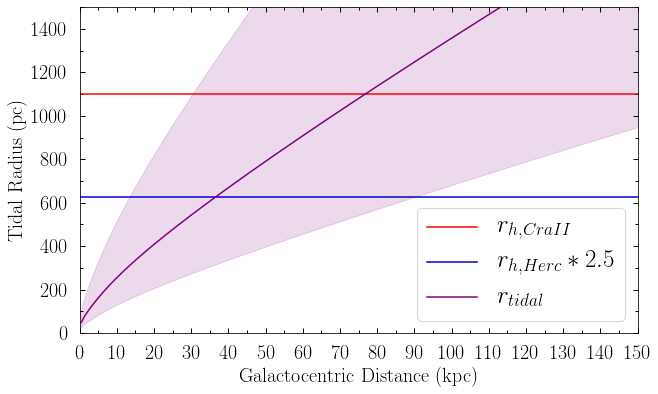

In [31]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
plt.axhline(y=1100,label=r'$r_{h, Cra II}$',color='red')
plt.axhline(y=250*2.5,label=r'$r_{h, Herc}*2.5$',color='mediumblue')

plt.plot(dper, rj_cra_all,label=r'$r_{tidal}$',color='purple')

plt.fill_between(dper, rj_cra_all*2, rj_cra_all/2, label=r'', color='purple',alpha=0.15)

# plt.plot(dper, rj_cra_all/2,
#          label=r'$r_{tidal}/2$',color='red',ls='-.')

plt.legend(ncol=1,fontsize=25,loc='lower right')

plt.xlabel('Galactocentric Distance (kpc)',fontsize=20)
plt.ylabel('Tidal Radius (pc)',fontsize=20)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))

# ax.set_yticklabels(np.round(np.arange(-20,15,5),0),fontsize=labsize)
# ax.set_xticklabels(np.round(np.arange(-20,15,5),0),fontsize=labsize)

major_tick_length = 5
major_tick_width = 1
minor_tick_length = 3
minor_tick_width = 1

ax.tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='major',
                 length = major_tick_length, width = major_tick_width)
ax.tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='minor',
                  length = minor_tick_length, width = minor_tick_width)



plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(0,150)
plt.ylim(0,1500)

plt.savefig('/Users/Sal/research/dsph_dynamicalevo/tidalevo_ppr/tidalradii.pdf',dpi=dpi,bbox_inches='tight')